### **Sampling and Aliasing: Quick Demonstration**

- **Sampling** is the process of converting a continuous (analog) signal into a discrete (digital) one by taking measurements at regular intervals, called the *sampling rate*.
- **Nyquist Theorem** says: to accurately capture a signal without distortion, the sampling rate must be at least **twice the maximum frequency** present in the signal.

* * *

### **Aliasing**

- **Aliasing** occurs when a signal is sampled below its Nyquist rate.
- Higher frequency components are misinterpreted as lower frequencies, causing distortion.

* * *

### **Simple Example**

Imagine a pure sine wave of **frequency 700 Hz**.

- If you sample it at **2000 Hz** (sampling rate &gt; 2×700 = 1400 Hz), it is captured correctly.
- If you sample it at **1000 Hz** (sampling rate &lt; 2×700 = 1400 Hz), **aliasing** happens:  
It will appear incorrectly as a **300 Hz** signal!

This false lower-frequency component is the "alias."

* * *

### **Visual Intuition**

If you plot:

- Original sine wave (continuous line)
- Sampled points (dots)

At low sampling rates, dots **mislead** you about the true frequency of the wave.

* * *

### **In Short**

| Sampling Rate | Result | Notes |
| --- | --- | --- |
| &gt; 2× signal frequency | Correct reproduction | Safe sampling |
| &lt; 2× signal frequency | Aliasing occurs | Distorted, wrong frequency |

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

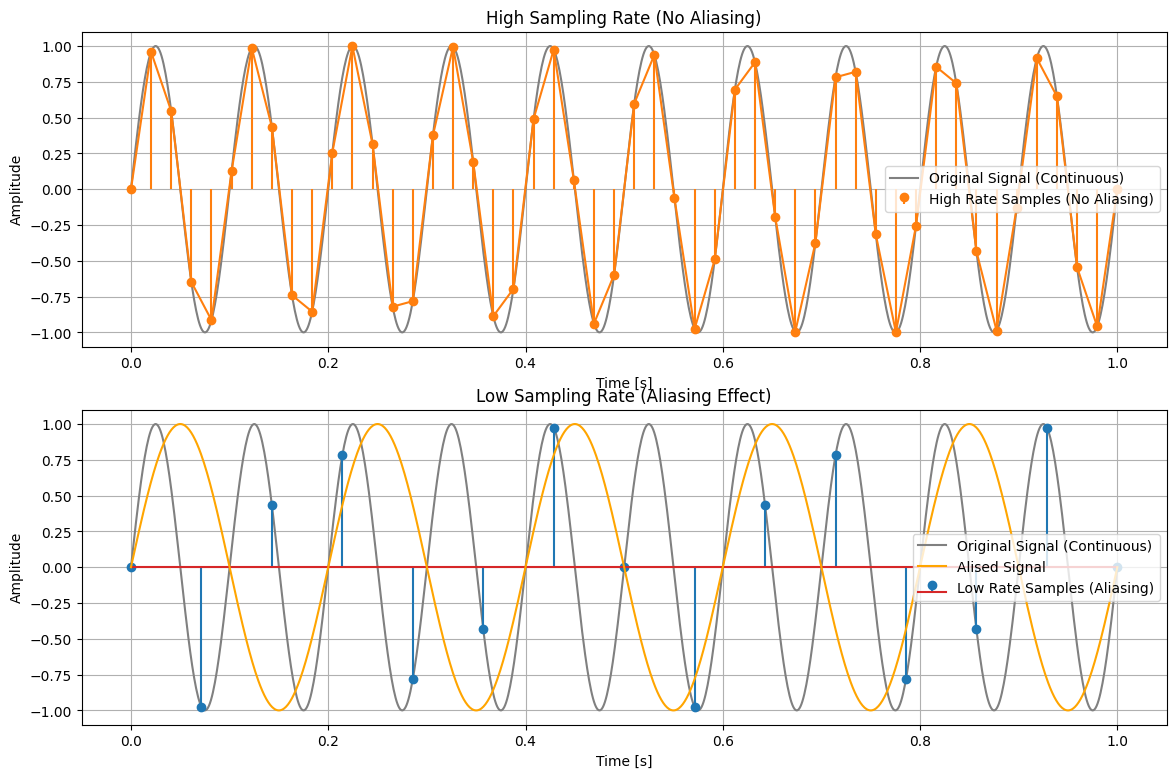

In [7]:
# Original signal parameters
f_signal = 10  # Hz
T = 1          # seconds

# Time vectors
continuous_time = np.linspace(0, T, 1000)

# High sampling rate (no aliasing)
high_fs = 50  # Hz
high_sampled_time = np.linspace(0, T, int(high_fs*T))

# Low sampling rate (aliasing occurs)
low_fs = 15  # Hz
low_sampled_time = np.linspace(0, T, int(low_fs*T))

# Generate signals
continuous_signal = np.sin(2 * np.pi * f_signal * continuous_time)

high_sampled_signal = np.sin(2 * np.pi * f_signal * high_sampled_time)

low_sampled_signal = np.sin(2 * np.pi * f_signal * low_sampled_time)


# Aliased signal
f_alias = abs(low_fs - f_signal)  # 5 Hz
aliased_signal = np.sin(2 * np.pi * f_alias * continuous_time)

# Plotting
plt.figure(figsize=(14, 9))

# Continuous signal
plt.subplot(2, 1, 1)
plt.plot(continuous_time, continuous_signal, label='Original Signal (Continuous)', color='gray')
plt.stem(high_sampled_time, high_sampled_signal, linefmt='C1-', markerfmt='C1o', basefmt=" ", label='High Rate Samples (No Aliasing)')
plt.plot(high_sampled_time,high_sampled_signal)
plt.title('High Sampling Rate (No Aliasing)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Aliased signal
plt.subplot(2, 1, 2)
plt.plot(continuous_time, continuous_signal, label='Original Signal (Continuous)', color='gray')
plt.stem(low_sampled_time, low_sampled_signal, label='Low Rate Samples (Aliasing)')
plt.plot(continuous_time,aliased_signal,color='orange',label='Alised Signal')
plt.title('Low Sampling Rate (Aliasing Effect)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)


plt.show()

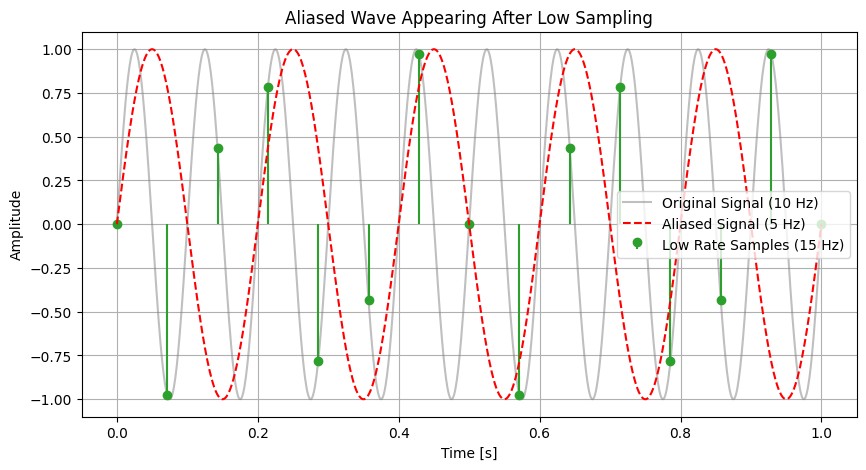

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_signal = 10  # Original frequency (Hz)
T = 1          # Duration (seconds)
low_fs = 15    # Low sampling rate (Hz)

# Time arrays
continuous_time = np.linspace(0, T, 1000)
low_sampled_time = np.linspace(0, T, int(low_fs*T))

# Signals
continuous_signal = np.sin(2 * np.pi * f_signal * continuous_time)
low_sampled_signal = np.sin(2 * np.pi * f_signal * low_sampled_time)

# Aliased signal
f_alias = abs(low_fs - f_signal)  # 5 Hz
aliased_signal = np.sin(2 * np.pi * f_alias * continuous_time)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(continuous_time, continuous_signal, label='Original Signal (10 Hz)', color='gray', alpha=0.5)
plt.stem(low_sampled_time, low_sampled_signal, linefmt='C2-', markerfmt='C2o', basefmt=" ", label='Low Rate Samples (15 Hz)')
plt.plot(continuous_time, aliased_signal, label='Aliased Signal (5 Hz)', color='red', linestyle='--')

plt.title('Aliased Wave Appearing After Low Sampling')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
